In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/V1.csv")
print(df.shape)
print(df.info())
df.head()

(20000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             20000 non-null  int64 
 1   workclass       20000 non-null  object
 2   fnlwgt          20000 non-null  int64 
 3   education       20000 non-null  object
 4   education-num   20000 non-null  int64 
 5   marital-status  20000 non-null  object
 6   occupation      20000 non-null  object
 7   relationship    20000 non-null  object
 8   race            20000 non-null  object
 9   sex             20000 non-null  object
 10  capital-gain    20000 non-null  int64 
 11  capital-loss    20000 non-null  int64 
 12  hours-per-week  20000 non-null  int64 
 13  native-country  20000 non-null  object
 14  IncomeGroup     20000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.3+ MB
None


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,IncomeGroup
0,62,Self-emp-not-inc,26911,7th-8th,4,Widowed,Other-service,Not-in-family,White,Female,0,0,66,United-States,<=50K
1,18,Private,208103,11th,7,Never-married,Other-service,Other-relative,White,Male,0,0,25,United-States,<=50K
2,25,Private,102476,Bachelors,13,Never-married,Farming-fishing,Own-child,White,Male,27828,0,50,United-States,>50K
3,33,Private,511517,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
4,36,Private,292570,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
df = df.replace(' ?',np.nan)

In [4]:
df.isnull().sum()

age                  0
workclass         1137
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1140
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     354
IncomeGroup          0
dtype: int64

In [5]:
df['education-num'].corr(df['capital-gain'])

0.12456727883397226

In [6]:
from sklearn.impute import SimpleImputer
columns_to_impute = ['workclass','occupation','native-country']
imputer = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [8]:
import numpy as np
y = df["IncomeGroup"]
X = df.drop("IncomeGroup",axis =1)
numaric  = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
catag = list(set(X.columns) - set(numaric))

from  sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

ppl = [("cat",OneHotEncoder(sparse_output = False),catag),("ss",StandardScaler(),numaric)]
cat = ColumnTransformer(ppl)
X_ct  = cat.fit_transform(X)
X_ct.shape
len(catag),len(numaric)
#X.head()
df_processed = pd.DataFrame(X_ct,columns =cat.get_feature_names_out() )
df_processed.shape

(20000, 105)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(df_processed,test_size = 0.2,random_state = 64)
y_train,y_test = train_test_split(y,test_size = 0.2,random_state = 64)
y_train.shape

(16000,)

In [10]:
from sklearn.linear_model import Perceptron
perc = Perceptron(fit_intercept=True,warm_start=False)
model_02 = perc.fit(X_train,y_train)
print(model_02.score(X_train,y_train))

0.813


In [11]:
perc2 = Perceptron(early_stopping=True,fit_intercept = True,warm_start = False,random_state = 42)
model_03=perc2.fit(X_train,y_train)
bias_value = model_03.intercept_
print(bias_value)

[-8.]


In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
sgd_reg = SGDClassifier(
    loss='log_loss',
    penalty='l2',  # Ridge regularization (L2 regularization)
    max_iter=10,
    learning_rate='constant',
    eta0=0.01,
    alpha=0.001,
    random_state=64,
    warm_start=False
)
model_04 = sgd_reg.fit(X_train,y_train)
y_pred = model_04.predict(X_test)
print(model_04.score(X_train,y_train))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8510625
0.84825
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      3074
        >50K       0.70      0.61      0.65       926

    accuracy                           0.85      4000
   macro avg       0.79      0.76      0.78      4000
weighted avg       0.84      0.85      0.84      4000



In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
regressor = LogisticRegression(tol = 1e-3,max_iter=100,solver='sag',random_state = 64)
model_05 = regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
rec_score = recall_score(y_test,y_pred,average='macro')
print(rec_score)

0.7528715724863027


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

params = {
    'n_neighbors':[1,3,5,7]
}

classifier_2 = KNeighborsClassifier(metric = 'minkowski',p=2)
grid_cv = GridSearchCV(estimator=classifier_2,param_grid = params,scoring='accuracy',cv = 4)
model_06 = grid_cv.fit(X_train,y_train)
print(model_06.best_params_)

{'n_neighbors': 7}


In [15]:
from sklearn.tree import DecisionTreeClassifier

params_02 = {
    'max_depth':[3,4,5,6],
    'min_samples_leaf':[2,4,6,8,10],
    'criterion':['gini'],
    'splitter':['best']
}
classifier_03 = DecisionTreeClassifier(random_state = 64)
grid_cv_02 = GridSearchCV(estimator = classifier_03,param_grid=params_02,cv=4)
model_07 = grid_cv_02.fit(X_train,y_train)

In [16]:
bes_model = model_07.best_estimator_
score_01 = bes_model.score(X_test,y_test)
print(score_01)
model_07.best_params_

0.84975


{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 10,
 'splitter': 'best'}

In [17]:
best_tree = bes_model.tree_
help(best_tree)
num_nodes = best_tree.node_count
print("Number of nodes in the optimal tree:", num_nodes)

Help on Tree object:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For leave

In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier_03 = RandomForestClassifier(random_state = 64)
params_03 = {
    'n_estimators':[5,6,7,8,9,10]
}
cv_04 = GridSearchCV(estimator = classifier_03,param_grid=params_03)
model_10 = cv_04.fit(X_train,y_train)

In [20]:
print(model_10.best_params_)

{'n_estimators': 10}


In [21]:
from sklearn.ensemble import AdaBoostClassifier
ada_01 = AdaBoostClassifier(random_state = 64)
params_05 = {
    'n_estimators':[10,20,30],
    'learning_rate':[0.5,1,2]
}
cv_05 = GridSearchCV(estimator = ada_01,param_grid=params_05,cv = 4)
model_11 = cv_05.fit(X_train,y_train)

In [22]:
from sklearn.metrics import accuracy_score
y_pred = model_11.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.853


In [23]:
print(model_11.best_params_)

{'learning_rate': 1, 'n_estimators': 30}


In [ ]:
from sklearn.svm import SVC
params_11 = {
    'C': [1,10],
    'kernel':['linear','rgf']
}
svm = SVC()
cv_final = GridSearchCV(estimator = svm,param_grid=params_11)
model_final = cv_final.fit(X_train,y_train)
print(model_final.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param

{'C': 10, 'kernel': 'linear'}


In [25]:
df_02 = pd.read_csv("/content/V2.csv")
print(df_02.shape)
print(df_02.info())
df_02.head()

(12499, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499 entries, 0 to 12498
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   General_Health                12499 non-null  int64  
 1   Checkup                       12499 non-null  float64
 2   Exercise                      12499 non-null  int64  
 3   Skin_Cancer                   12499 non-null  int64  
 4   Other_Cancer                  12499 non-null  int64  
 5   Depression                    12499 non-null  int64  
 6   Diabetes                      12499 non-null  int64  
 7   Arthritis                     12499 non-null  int64  
 8   Sex                           12499 non-null  int64  
 9   Age_Category                  12499 non-null  int64  
 10  Height_(cm)                   12499 non-null  float64
 11  Weight_(kg)                   12499 non-null  float64
 12  BMI                           12499 non-null  in

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,2,4.0,1,1,0,0,0,0,1,2,175.0,83.91,2,1,10.0,30.0,12.0,4.0,0
1,2,4.0,1,0,1,0,1,0,0,6,165.0,90.72,3,0,0.0,60.0,30.0,1.0,0
2,4,4.0,1,0,0,1,0,0,0,2,168.0,68.04,1,0,1.0,10.0,6.0,10.0,0
3,4,1.0,1,0,0,0,0,0,0,2,163.0,90.72,3,0,0.0,12.0,0.0,4.0,0
4,2,4.0,0,0,0,1,0,0,1,0,173.0,54.43,0,1,4.0,0.0,1.0,5.0,0


In [28]:
X = df_02.drop('Heart_Disease',axis = 1)
y = df_02['Heart_Disease']

In [29]:
print(y.value_counts(normalize = True))

1    0.587407
0    0.412593
Name: Heart_Disease, dtype: float64


In [49]:
from sklearn.model_selection import train_test_split
X_train_01,X_test_01,y_train_01,y_test_01 = train_test_split(X,y,test_size = 0.2,random_state=64)
print(X_train.shape)

(9999, 18)


In [50]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
regressor_02 = LogisticRegression(solver = 'lbfgs',tol = 1e-4,C = 0.1,max_iter=100,random_state = 64)
model_12 = regressor_02.fit(X_train_01,y_train_01)
y_pred =model_12.predict(X_test_01)
print(f1_score(y_test_01,y_pred))
print(model_12.intercept_)

0.8649186856953204
[-0.08906489]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
from sklearn.model_selection import GridSearchCV
params_100 = {
    'solver': ['lbfgs','sag'],
    'max_iter': [100,200,500],
    'C': [0.01,0.1,1,10]
}
log_reg = LogisticRegression(random_state = 64)
cv_100 = GridSearchCV(estimator=log_reg,param_grid=params_100,cv = 4)
model_100 = cv_100.fit(X_train_01,y_train_01)
print("Best Parameters",model_100.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters {'C': 10, 'max_iter': 200, 'solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
from sklearn.metrics import precision_score
best_model = model_100.best_estimator_
y_pred_100 = best_model.predict(X_test_01)
print(precision_score(y_test,y_pred_100))

0.854521625163827


In [55]:
from sklearn.tree import DecisionTreeClassifier
tree_1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=10,min_samples_split=50,random_state = 64)
tree_2 = DecisionTreeClassifier(criterion = 'entropy',ccp_alpha=0.01,random_state = 64)
model_tree_1 = tree_1.fit(X_train_01,y_train_01)
model_tree_2 = tree_2.fit(X_train_01,y_train_01)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y_pred_t1 = model_tree_1.predict(X_test_01)
y_pred_t2 = model_tree_2.predict(X_test_01)
print(accuracy_score(y_test_01,y_pred_t1))
print(accuracy_score(y_test_01,y_pred_t2))

0.8364
0.8052


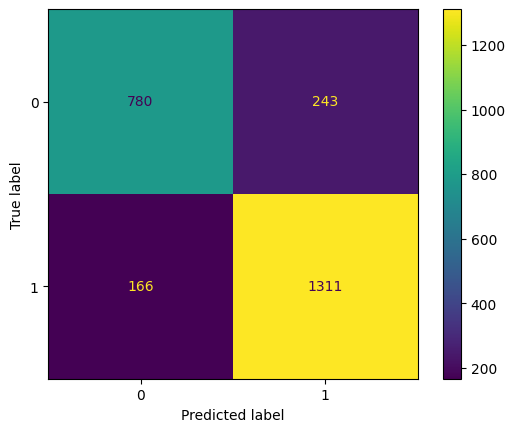

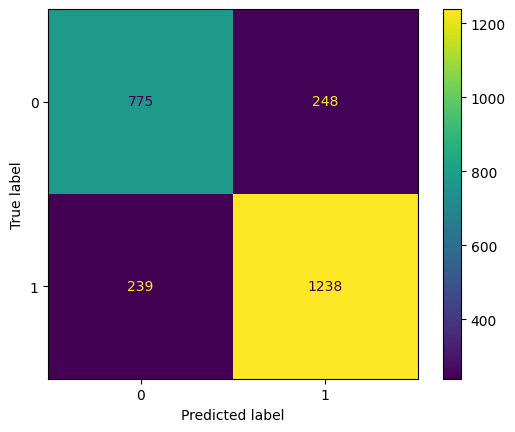

In [62]:
c1 = confusion_matrix(y_test_01,y_pred_t1)
c2 = confusion_matrix(y_test_01,y_pred_t2)
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
display_01 = ConfusionMatrixDisplay(c1)
display_02 = ConfusionMatrixDisplay(c2)
display_01.plot()
display_02.plot()

In [64]:
diff = np.abs(1311-1238)
diff

73

In [73]:
n1 = model_tree_1.tree_.node_count
n2 = model_tree_2.tree_.node_count
print(n1+n2)

358


In [74]:
from sklearn.ensemble import RandomForestClassifier
clas_100 = RandomForestClassifier(random_state = 64)
params_1000 = {
    'n_estimators':[10,20,30],
    'max_features':['sqrt','log2'],
    'min_impurity_decrease':[0.001,0.01,0.1]
}
cv_1000 = GridSearchCV(estimator = clas_100,param_grid = params_1000,cv = 5)
model_1000 = cv_1000.fit(X_train_01,y_train_01)

In [76]:
y_pred_1000 = model_1000.predict(X_test_01)
print(confusion_matrix(y_test_01,y_pred_1000)[0,1]+confusion_matrix(y_test_01,y_pred_1000)[1,0])

393


In [77]:
best_model = model_1000.best_estimator_
best_model.min_impurity_decrease

0.001

In [80]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

classifier_ada = AdaBoostClassifier(random_state = 64)
parame = {
    'n_estimators':[20,30,50],
    'learning_rate':[0.1,0.5,1,2]
}
random_01 = RandomizedSearchCV(estimator=classifier_ada,param_distributions=parame,cv=5)
grid_01 = GridSearchCV(estimator = classifier_ada,param_grid = parame,cv = 5)
model_rm = random_01.fit(X_train_01,y_train_01)
model_cv = grid_01.fit(X_train_01,y_train_01)

In [82]:
y_pred_gv = model_cv.predict(X_test_01)
y_pred_rm = model_rm.predict(X_test_01)
print(f"The Accuracy score using Grid Search CV is {accuracy_score(y_test_01,y_pred_gv)}, and the Accuracy Score using Randomized Search CV is {accuracy_score(y_test_01,y_pred_rm)}")

The Accuracy score using Grid Search CV is 0.8736, and the Accuracy Score using Randomized Search CV is 0.8736


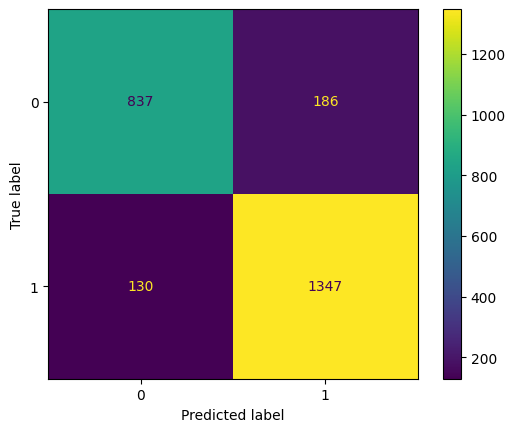

In [84]:
conf = confusion_matrix(y_test_01,y_pred_gv)
display_02 = ConfusionMatrixDisplay(conf)
display_02.plot()